SGDClassifier with max_iter=200

In [14]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("Training data array shape:signs_t ",signs_train.shape)
print("Training data length: ",len(signs_train.index))

file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("Testing data array shape:signs_t ",signs_test.shape)
print("Testing data length: ",len(signs_test.index))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
Training data array shape:signs_t  (27455, 785)
Training data length:  27455
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
Testing data array shape:signs_t  (7172, 785)
Testing data length:  7172


In [15]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)

## Display images
#format into 28x28 pixel image
#index = 200
#someSign = X_train.iloc[index].reshape(28,28)

#show original image
#plt.imshow(someSign)

#show binary image
#print("printing ", y_train[index])
#plt.imshow(someSign, cmap = matplotlib.cm.gray, interpolation="nearest")
#plt.show()





In [16]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]
someSign = X_train[0]



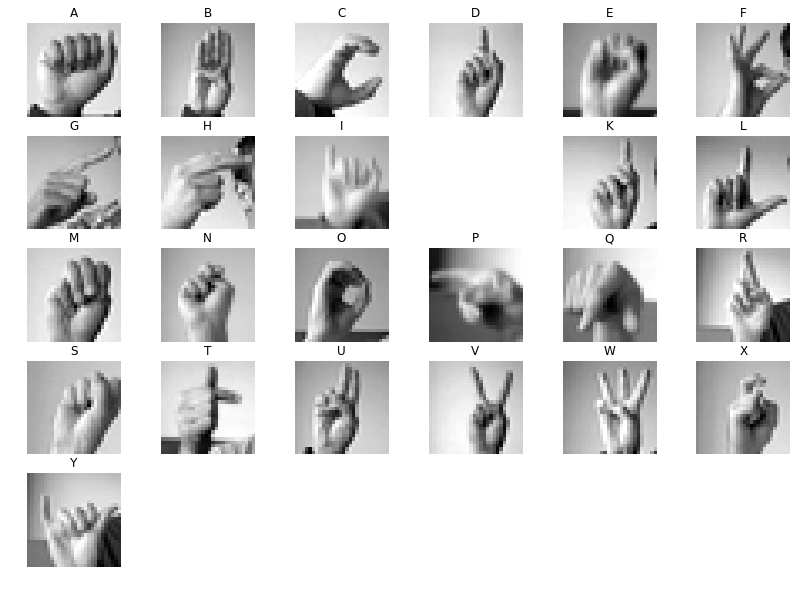

In [17]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    #print(index, signIndex)
    if index == 0:
        SIGN_A = signIndex
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

In [18]:
SIGN_A = y_train[SIGN_A]
SIGN_A

0

In [19]:
## TRAINING ###

## Training binary classifier to recoginize sign A
y_train_5 = (y_train == SIGN_A) 
y_test_5 = (y_test == SIGN_A) 

print("Training...")
sgd_clf = SGDClassifier(random_state = 42, max_iter=200,n_jobs=-1) #use all cpu cores
sgd_clf.fit(X_train, y_train_5)



Training...


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
### VALIDATION ###
# manual testing for few samples
# print("Testing...")
# print(y_train_5[19],sgd_clf.predict([X_train[19]]))
# print(y_train_5[20],sgd_clf.predict([X_train[20]]))
# print(y_test_5[95],sgd_clf.predict([X_test[95]]))
# print(y_test_5[94],sgd_clf.predict([X_test[94]]))
# print(y_test_5[111],sgd_clf.predict([X_test[111]]))

#cross-validation using K-fold with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")
#getting 99.9% accuracy, array([ 0.99901672,  0.99967217,  0.99934433])



array([ 0.99956298,  0.99912578,  0.99967217])

In [21]:
# confusion matric computation returning predictions made on each test fold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)
confusion_matrix(y_train_5, y_train_pred)
# array([[26241,    10],
#       [    8,  1196]])
# non-5 images, 26241 corectly classified as not-5 (true negatives TN)
#               10 wrongly classified as 5 (false positives FP)
# 5 images (positive class), 8 wrongly classified (flase negatives FN)
#                            1196 correctly classified (true positives TP)




array([[26316,    13],
       [    2,  1124]])

In [22]:
# Precision of the classifier =  TP/(TP + FP)
# Recall (sensitivity) = TP/(TP+FN)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)  
# 0.99170812603648428




0.98856640281442387

In [23]:
recall_score(y_train_5, y_train_pred)
# 0.99335548172757471
# !!! Sign 5 is correct 99.2% of the time and it detects 99.3% of all 5s

0.9982238010657194

In [24]:
#Combining precision and recall into once metric - F1 score (harmonic mean)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# 0.99253112033195035, 99.2%

0.99337163057887767

Decision Function
decision_function() method returns a score of each instance

In [25]:
y_scores = sgd_clf.decision_function([someSign])
y_scores

array([-72690.47549297])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
y_some_digit_pred

array([False], dtype=bool)

In [28]:
threshold = -9000
y_some_digit_pred = (y_scores > threshold)

In [29]:
y_some_digit_pred

array([False], dtype=bool)

In [30]:
#specify to return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function", n_jobs=-1)

In [31]:
y_scores.shape

(27455,)

In [32]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.19.1.


In [33]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
#if y_scores.ndim == 2:
#    y_scores = y_scores[:, 1]

In [34]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

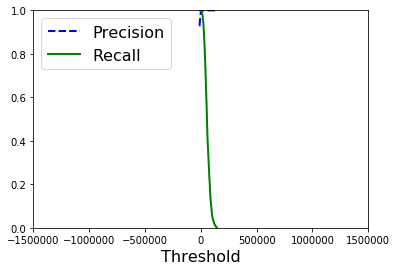

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
#    plt.ylim([0, 1])

#plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1500000, 1500000])
plt.ylim([0, 1])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()



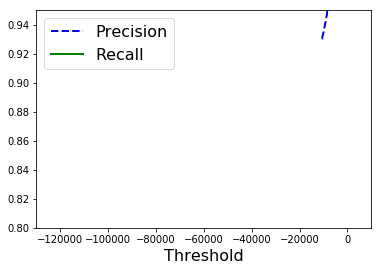

In [36]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-130000, 10000])
plt.ylim([0.8,0.95])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

# PR Curve

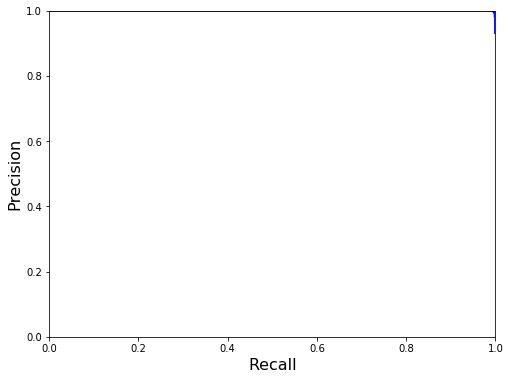

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    

plt.figure(figsize=(8, 6))
plt.axis([0, 1, 0, 1])
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

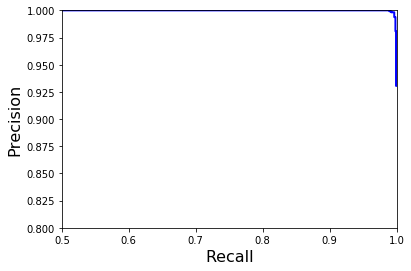

In [38]:
#let's say we want very high precision of 90%, whcih should give us about 75% of recall
# plot shows, that our threshold shall be 0
plt.axis([0.5, 1, 0.8, 1])
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [39]:
y_train_pred_995 = (y_scores > 0)
print("Precision Score = ",precision_score(y_train_5, y_train_pred_995))


Precision Score =  0.988566402814


In [40]:
print("Recall Score = ",recall_score(y_train_5, y_train_pred_995))

Recall Score =  0.998223801066


#verfied, with precision of 90%, we get 76% recall

## ROC curve

In [41]:
## ROC curve - Receiver Operating Characterstics - common tool used with binary classifiers
# ROC prints true positive rate (racall) against flase positive rate
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


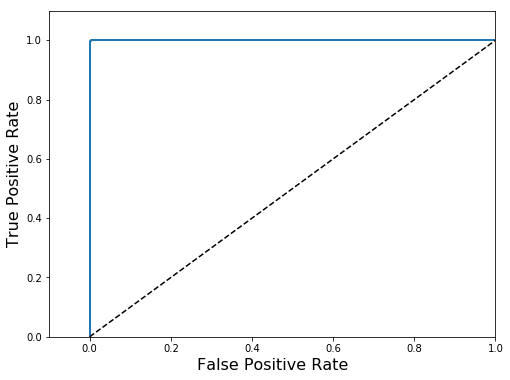

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6))
plt.axis([-0.1, 1, 0, 1.1])
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

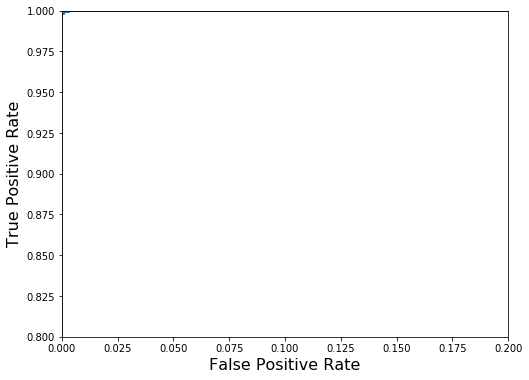

In [43]:
# zoom in
plt.figure(figsize=(8, 6))
plt.axis([0, 0.2, 0.8, 1])
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [44]:
# measuring AUC - Aera Under the Curve
from sklearn.metrics import roc_auc_score

print("ROC AUC score = ",roc_auc_score(y_train_5, y_scores))

ROC AUC score =  0.999995513797


In [45]:
## Comparing SGDCClassifier with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [46]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

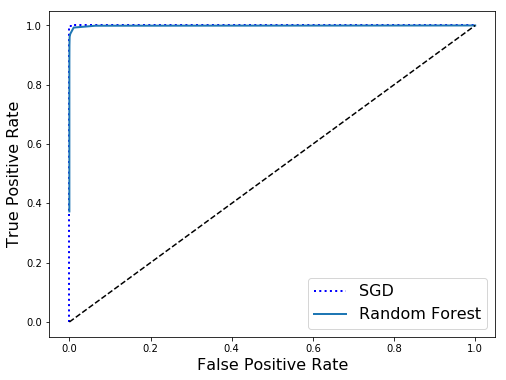

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [48]:
print("ROC AUC score = ",roc_auc_score(y_train_5, y_scores_forest))

ROC AUC score =  0.999125932565


In [49]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print("Precision Score = ",precision_score(y_train_5, y_train_pred_forest))

Precision Score =  0.998997995992


In [50]:
print("Recall Score = ",recall_score(y_train_5, y_train_pred_forest))

Recall Score =  0.885435168739


## Multiclass classification¶

 The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion). 

Using binary classifiers for multiclass classificatino
OvA (One-vesus-All) strategy we need to train 24 binary classifiers
OvO (One-verus-One) strategy, this means we would need to train 276 binary classifiers (N*(N-1)/2), but training sets are smaller because we only use two classes out of 24.

Scikit-Learn automatically detects when you try to use a binary classifier for multi-class classification task, and it automatically runs OvA (except for SVM where it uses OvO, since SVM scale poorly with the size).


In [51]:
## SGDClassifier
# train for multi-class classification
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([someSign])
Print("testing SGD classifier accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

0.64417177914110424

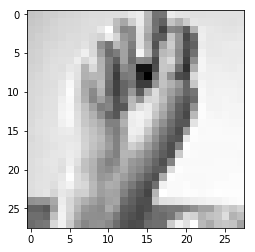

In [63]:
someSignImage = someSign.reshape(28,28)
plt.imshow(someSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
plt.show()

In [64]:
some_sign_scores = sgd_clf.decision_function([someSign])
some_sign_scores

array([[ -67884.92008842,  -13914.17399685,  -63458.52366353,
         -75689.06276749,  -19977.4989127 ,  -34267.16217062,
         -49872.78166285,  -71943.00721049,  -62120.39748919,
         -69901.00180459, -147374.37218318, -127544.60378157,
          37029.68893635,  -22762.42029482,  -17911.38360948,
         -73891.15400389,  -95919.48570665, -143534.31412372,
         -23093.30482445, -160709.56595796, -102357.03305035,
         -13391.12480516,  -78418.34070982,  -92335.44013905]])

In [65]:
# find the class with highest score
np.argmax(some_sign_scores)

12

In [66]:
#after classifier gets trained, classes_ array holds the list of target classes
sgd_clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [67]:
print("Number of binary classifiers trained: ",len(sgd_clf.classes_))

Number of binary classifiers trained:  24


In [68]:
## Forcing to use OvO classifier strategy with SGDCClassifier 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42,max_iter=200,tol=None), n_jobs=-1)
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([someSign])

array([13])

In [69]:
print("Number of binary classifiers trained: ",len(ovo_clf.estimators_))

Number of binary classifiers trained:  276


In [53]:
## Training multi-class Random Forest Classifier
#SIGN_ = 34
#someSign = X_train[SIGN_]

forest_clf.fit(X_train, y_train)
forest_clf.predict([someSign])
print("testing random forest classifier accuracy...")
forest_clf.score(X_test, y_test,sample_weight=None)

testing random forest classifier accuracy...


0.66703848298940327

In [71]:
#List of probabilities that classifier assigned to match someSign
forest_clf.predict_proba([someSign])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [72]:
# Cross-validate SGDClassifier accuracy using cross_val_score()
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.99879939,  0.99945367,  0.9959523 ])

In [73]:
# Cross-validate RandomForestClassifier accuracy using cross_val_score()
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.97576948,  0.97508741,  0.97604201])

In [57]:
# Trying regularisation by scaling inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
#and test on test set
sgd_clf.fit(X_train_scaled, y_train)
print("testing SGD classifier accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

testing SGD classifier accuracy...


0.412297824874512

In [55]:
sgd_clf.score(X_test, y_test,sample_weight=None)

0.412297824874512

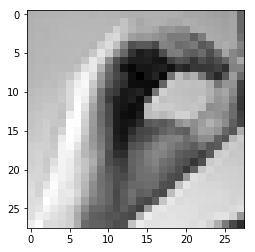

In [75]:
SIGN = 34
someSign = X_train[SIGN]
someSignImage = someSign.reshape(28,28)
plt.imshow(someSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
plt.show()

In [76]:
#just print first 20 elements of array
y_train[0:40]

array([13, 19,  0, 18, 17, 24, 15,  4, 15, 16, 22, 16, 11, 15,  7, 11, 22,
       19,  5, 20,  2,  7, 23, 16, 17,  2, 12, 17,  7, 24,  5, 10,  7, 11,
       14,  7,  7, 19,  1,  1])

# ERROR ANALYSIS

In [77]:
#reduce sgd_clf max-iter
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix
# sgd_clf = SGDClassifier(random_state = 42, max_iter=10,n_jobs=-1) #use all cpu cores

#calculaing confusion matrix for SGDClassifier
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1085,    0,    0,    0,    0,    0,    0,    0,   16,    0,    0,
           1,    1,    0,    0,    0,    0,   23,    0,    0,    0,    0,
           0,    0],
       [   0, 1004,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    5,    0,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0],
       [   0,    0, 1144,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0, 1117,    0,    1,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    5,    5,    0,   17,   39,    0,
          11,    0],
       [   0,    0,    0,    0,  937,    0,    0,    0,    0,    0,    0,
           5,    0,    0,    0,    0,    0,   15,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0, 1112,    3,    0,    0,   43,    0,
           0,    0,    0,    0,    0,    0,    0,   31,    4,    0,   11,
       

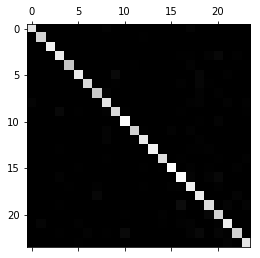

In [78]:
# plotting confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [79]:
#comparing error rates rather than absolute number of erors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [80]:
norm_conf_mx[15:19]

array([[  0.00000000e+00,   2.34558249e-03,   0.00000000e+00,
          7.81860829e-04,   0.00000000e+00,   7.03674746e-03,
          0.00000000e+00,   0.00000000e+00,   2.34558249e-03,
          0.00000000e+00,   7.81860829e-04,   7.81860829e-04,
          5.47302580e-03,   0.00000000e+00,   7.03674746e-03,
          9.49179046e-01,   0.00000000e+00,   1.01641908e-02,
          0.00000000e+00,   5.47302580e-03,   0.00000000e+00,
          0.00000000e+00,   8.60046912e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.15919629e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.72797527e-04,   3.09119011e-03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.24265842e-01,   1.54559505e-02,
          0.00000000e+00,   1.23647604e-02,   2.93663060e-02,
          3.09119011e-03,   0.00000000e+00,   0.00000000e+00],
      

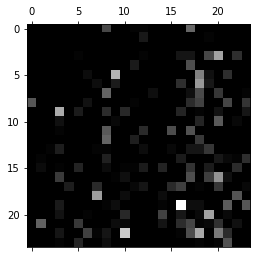

In [81]:
np.fill_diagonal(norm_conf_mx, 0)
#plt.figure(figsize=(10, 10))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# rows represent actual classes
# columns represent predicted classes
# bright columsn show that 17 and 18 are often misclassified

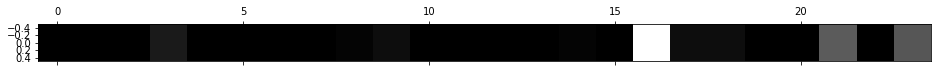

In [82]:

#np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx[19:20], cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [83]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [84]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [85]:
# cl_a, cl_b = 3, 5
# X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
# X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
# X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
# X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
# plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
# plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
# plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# #save_fig("error_analysis_digits_plot")
# plt.show()

In [86]:
sgd_clf.score(X_test, y_test,sample_weight=None)

0.6176798661461238